## Stichproben aus einer nicht normalverteilten Grundgesamtheit
---------------------------------------- 

In [1]:
import numpy as np
from scipy.stats import uniform, beta, gamma
import matplotlib.pyplot as plt

## Form der Stichprobenverteilung

Die Form der Stichprobenverteilung bezieht sich auf die beiden folgenden Fälle.

1. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist normalverteilt.

2. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist nicht normalverteilt.

## Stichproben aus einer nicht normalverteilten Grundgesamtheit

Im vorangegangenen Abschnitt haben wir die Form von Stichprobenverteilungen erörtert, wenn eine Stichprobe aus einer normalverteilten Grundgesamtheit gezogen wird. In realen Anwendungen kennen wir jedoch oft nicht die tatsächliche Form der Grundgesamtheit.

Um zu verstehen, wie die Form der Verteilung der interessierenden Grundgesamtheit die Form der Stichprobenverteilung beeinflusst, führen wir ein Experiment durch. Wir betrachten drei verschiedene kontinuierliche Wahrscheinlichkeitsdichtefunktionen: die <a href="https://de.wikipedia.org/wiki/Stetige_Gleichverteilung">**Gleichverteilung**</a>, die <a href="https://de.wikipedia.org/wiki/Beta-Verteilung">**Beta-Verteilung**</a> und die <a href="https://de.wikipedia.org/wiki/Gammaverteilung">**Gamma-Verteilung**</a>. Wir gehen hier nicht ins Detail, aber die folgende Abbildung zeigt, dass diese drei PDF´s (Probability Density Functions) nicht normalverteilt sind.

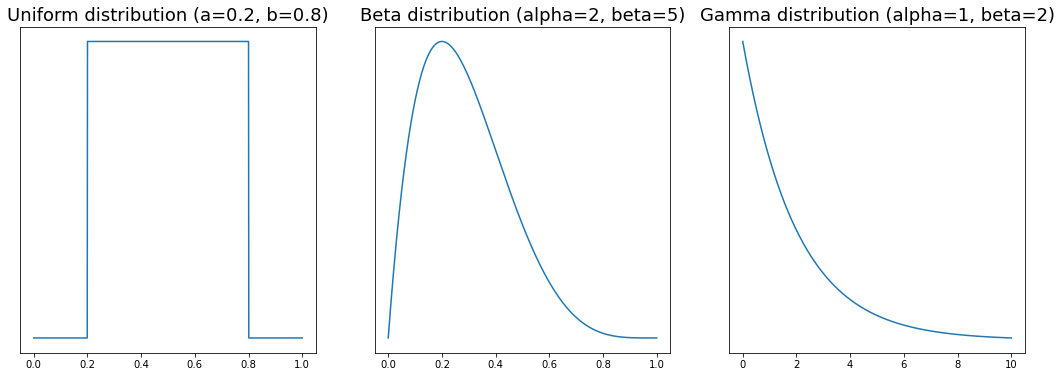

In [3]:
titles = [
    "Uniform distribution (a=0.2, b=0.8)",
    "Beta distribution (alpha=2, beta=5)",
    "Gamma distribution (alpha=1, beta=2)",
]
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(0, 1, 1000)
ax[0].plot(x, uniform.pdf(x, 0.2, 0.6))
ax[1].plot(x, beta.pdf(x, 2, 5))
x = np.linspace(0, 10, 1000)
ax[2].plot(x, gamma.pdf(x, a=1, scale=2))
for e, _ax in enumerate(ax):
    _ax.axes.yaxis.set_visible(False)
    _ax.set_title(titles[e], size=18)

Nun führen wir das gleiche Experiment wie im vorherigen Abschnitt durch. Für eine ausreichend große Anzahl von Versuchen <mark>Versuche = 1000 </mark> ziehen wir aus jeder einzelnen Verteilung eine Stichprobe. Diesmal hat jedoch jede einzelne Stichprobe einen Stichprobenumfang $n=2,5,15,30$. Für jede Stichprobe berechnen wir den Stichprobenmittelwert $\bar{x}$ und stellen die empirischen Wahrscheinlichkeiten nach $1000$ Versuchen dar.

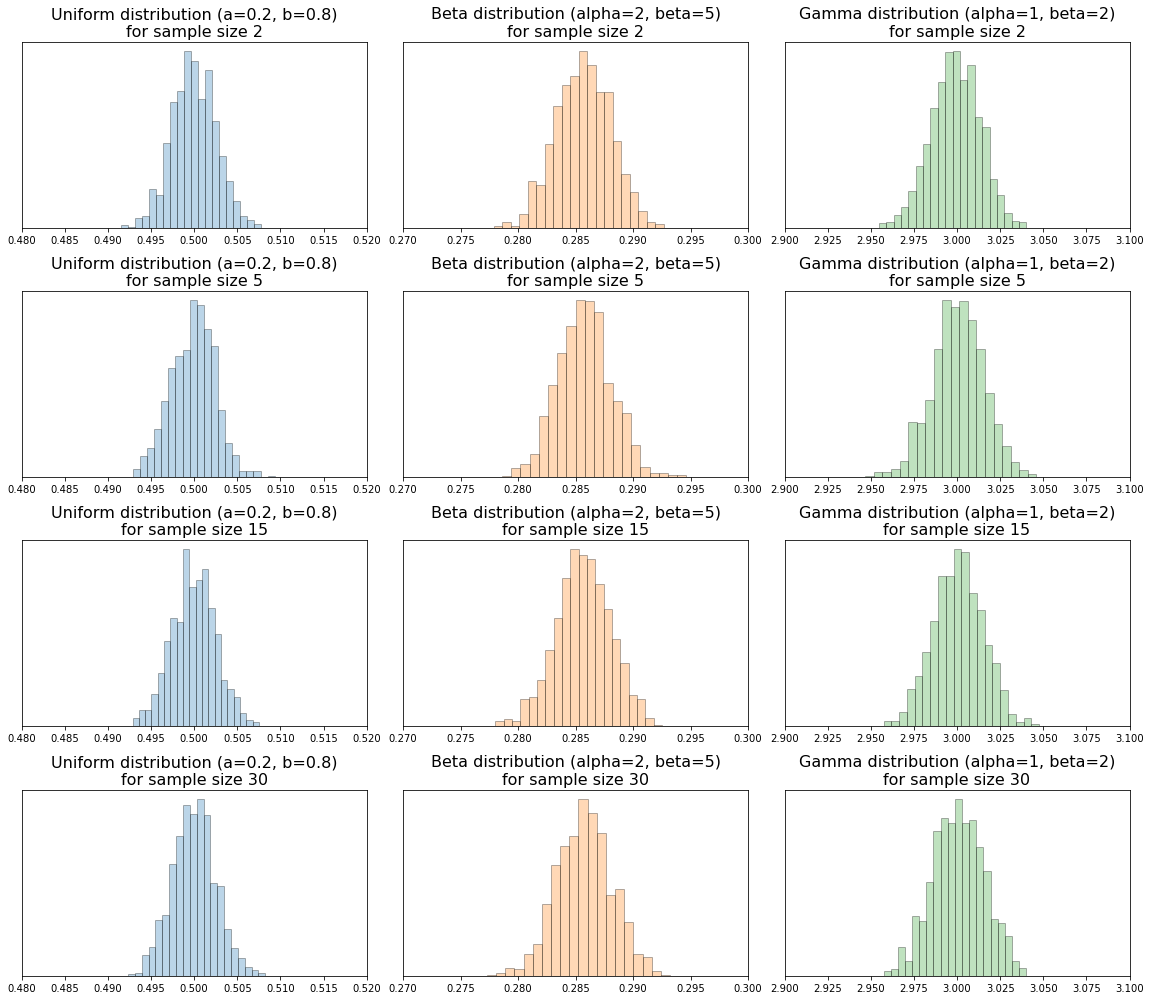

In [4]:
TRIALS = 1000
sample_sizes = [2, 5, 15, 30]
np.random.seed(42)
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(16, 14))
titles = [
    "Uniform distribution (a=0.2, b=0.8)",
    "Beta distribution (alpha=2, beta=5)",
    "Gamma distribution (alpha=1, beta=2)",
]
xlim = [(0.48, 0.52), (0.27, 0.30), (2.9, 3.1)]
for row, sample_size in enumerate(sample_sizes):
    for col, distribution in enumerate([uniform(0.2, 0.6), beta(2, 5), gamma(1, 2)]):
        sample = []
        for _ in range(TRIALS):
            sample.append(np.mean(distribution.rvs(size=sample_sizes)))
        ax[row, col].hist(
            sample, ec="black", density=False, bins=20, alpha=0.3, color=f"C{col}"
        )
        ax[row, col].set_title(f"{titles[col]}\nfor sample size {sample_size}", size=16)
        ax[row, col].set_xlim(xlim[col])
        ax[row, col].axes.yaxis.set_visible(False)
fig.tight_layout()

Die Abbildung zeigt, dass im Falle einer nicht normalverteilten Grundgesamtheit die Stichprobenverteilungen nicht normalverteilt sind, wenn $n<30$. Allerdings nähern sich die Stichprobenverteilungen einer Normalverteilung an, wenn $n>30$. Man sieht auch, dass die Streuung der Stichprobenverteilung mit zunehmendem Stichprobenumfang abnimmt.

Nach dem <a href="https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz">**zentralen Grenzwertsatz**</a> ist die Stichprobenverteilung bei einem großen Stichprobenumfang $(n > 30)$ annähernd normal, unabhängig von der Form der Grundgesamtheitsverteilung.

Der Mittelwert und die Standardabweichung der Stichprobenverteilung von $\bar{x}$ sind jeweils,

$$\mu_{\bar{x}} = \mu \text{ und } \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

Der Stichprobenumfang wird gewöhnlich als groß angesehen, wenn $n \geq 30$ ist.

Da die Stichprobenverteilung eine Normalverteilung approximiert, liefert die Fläche unter der Kurve der Stichprobenverteilung probabilistische Informationen über die Stichprobenstatistik.

Erinnern Sie sich an die **empirische Regel** ({cite:p}`fahrmeirstatistik` s.86), auch bekannt als die **68-95-99,7-Regel**. Auf die Stichprobenverteilung angewandt bedeutet die $68-95-99,7$-Regel folglich, dass

- etwa $68,26$% der Stichprobenmittelwerte innerhalb einer Standardabweichung des Populationsmittelwerts liegen werden,

- $95,44$% der Stichprobenmittelwerte innerhalb von zwei Standardabweichungen des Populationsmittelwertes liegen und

- etwa $99,74$% der Stichprobenmittelwerte innerhalb von drei Standardabweichungen des Mittelwerts der Grundgesamtheit liegen.